# Dopasowanie wzorca do tekstu

In [38]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Wszystkie algorytmy zostały zaimplementowane jako klasy z funkcją solve, która rozwiązuje problem i zwraca wynik razem z pomiarami czasów pre-proccesingu i wyszukiwania wzorca

## 1. Algorytm naiwny

In [5]:
class naive_algorithm:
    def __init__(self, text, pattern):
        self.text = text
        self.pattern = pattern
        
    def naive_string_matching(self):
        positive_shifts = []

        for shift in range(len(self.text) - len(self.pattern) + 1):
            if self.pattern == self.text[shift: shift + len(self.pattern)]:
                positive_shifts.append(shift)
        return positive_shifts
    
    def solve(self):
        time_start = time.time()
        result = self.naive_string_matching()
        time_end = time.time()
        
        time_of_preprocessing = 0.0
        time_of_searching = time_end - time_start
        return result, time_of_preprocessing, time_of_searching

## 2. Algorytm automatu skończonego

In [6]:
class fa_algorithm:
    def __init__(self, text, pattern):
        self.text = text
        self.pattern = pattern
        self.alphabet = self.get_alphabet()
        self.time_start = None
        self.time_preprocessed = None
        self.time_end = None
    
    def get_alphabet(self):
        alphabet = []
        for sign in self.text:
            if sign not in alphabet:
                alphabet.append(sign)

        for sign in self.pattern:
            if sign not in alphabet:
                alphabet.append(sign)
        return alphabet
        
    def __get_delta(self):
        delta = []

        for i in range(len(self.pattern) + 1):
            delta.append({})
            for sign in self.alphabet:
                state = min(i + 1, len(self.pattern))
                while state > 0 and self.pattern[:state] != (self.pattern[:i] + sign)[-state:]:
                    state -= 1
                delta[i][sign] = state
        return delta
    
    def finite_state_machine_string_matching(self):    
        positive_shifts = []
        delta = self.__get_delta()
        
        self.time_preprocessed = time.time()
        
        state = 0
        accepting_state = len(delta) - 1

        for i in range(len(self.text)):
            state = delta[state][self.text[i]]
            if state == accepting_state:
                positive_shifts.append(i + 1 - state)
                
        return positive_shifts
    
    def solve(self):
        self.time_start = time.time()
        result = self.finite_state_machine_string_matching()
        self.time_end = time.time()
        
        time_of_preprocessing = self.time_preprocessed - self.time_start
        time_of_searching = self.time_end - self.time_preprocessed
        return result, time_of_preprocessing, time_of_searching

## 3. Algorytm Knutha-Morrisa-Pratta

In [7]:
class kmp_algorithm:
    def __init__(self, text, pattern):
        self.text = text
        self.pattern = pattern
        self.time_preprocessed = None
        
    def __prefix_function(self):
        prefix_length_list = [0]
        prefix_length = 0

        for i in range(1, len(self.pattern)):
            while prefix_length > 0 and \
                    self.pattern[prefix_length] != self.pattern[i]:
                prefix_length = prefix_length_list[prefix_length - 1]
            if self.pattern[prefix_length] == self.pattern[i]:
                prefix_length += 1
            prefix_length_list.append(prefix_length)
        return prefix_length_list
    
    def knut_morris_pratt_string_matching(self):
        positive_shifts = []
        prefix_length_list = self.__prefix_function()
        self.time_preprocessed = time.time()
        prefix_length = 0

        for i in range(len(self.text)):
            while prefix_length > 0 and self.pattern[prefix_length] != self.text[i]:
                prefix_length = prefix_length_list[prefix_length - 1]
            if self.pattern[prefix_length] == self.text[i]:
                prefix_length += 1
            if prefix_length == len(self.pattern):
                positive_shifts.append(i + 1 - prefix_length)
                prefix_length = prefix_length_list[prefix_length - 1]
        return positive_shifts
    
    def solve(self):
        time_start = time.time()
        result = self.knut_morris_pratt_string_matching()
        time_end = time.time()
        
        time_of_preprocessing = self.time_preprocessed - time_start
        time_of_searching = time_end - self.time_preprocessed
        return result, time_of_preprocessing, time_of_searching

# Otwieramy plik i zamieniamy go na tekst

In [8]:
file = open("pan-tadeusz.txt", "r", encoding="utf-8")
text = ""
for line in file:
    text += line

# Tworzymy dwa poszukiwane wzorce

In [9]:
pattern1 = "pan"
pattern2 = "pani"

# Tworzymy obiekty odpowiednich klas dla każdej unikalnej pary algorytm-wzorzec

In [10]:
N1 = naive_algorithm(text, pattern1)
N2 = naive_algorithm(text, pattern2)
FA1 = fa_algorithm(text, pattern1)
FA2 = fa_algorithm(text, pattern2)
KMP1 = kmp_algorithm(text, pattern1)
KMP2 = kmp_algorithm(text, pattern2)

# Algorytm naiwny - liczba znalezionych wzorców w tekście

In [11]:
print("liczba wystąpień \"pan\":",len(N1.solve()[0]))
print("liczba wystąpień \"pani\":",len(N2.solve()[0]))

liczba wystąpień "pan": 401
liczba wystąpień "pani": 100


# Algorytm automatu skończonego - liczba znalezionych wzorców w tekście

In [12]:
print("liczba wystąpień \"pan\":",len(FA1.solve()[0]))
print("liczba wystąpień \"pani\":",len(FA2.solve()[0]))

liczba wystąpień "pan": 401
liczba wystąpień "pani": 100


# Algorytm Knutha-Morrisa-Pratta - liczba znalezionych wzorców w tekście

In [13]:
print("liczba wystąpień \"pan\":",len(KMP1.solve()[0]))
print("liczba wystąpień \"pani\":",len(KMP2.solve()[0]))

liczba wystąpień "pan": 401
liczba wystąpień "pani": 100


# Sprawdzenie, że wszystkie znalezione wzorce są takie same dla różych algorytmów

In [14]:
print(FA1.solve()[0] == KMP1.solve()[0] and FA1.solve()[0] == N1.solve()[0])  

True


In [15]:
print(FA2.solve()[0] == KMP2.solve()[0] and FA2.solve()[0] == N2.solve()[0]) 

True


# Funkcja porównująca szybkość

In [40]:
def speed_test(algorithm_class_object, number_of_tests=10):
    total_time_pre_proccessing = 0.0
    max_time_pre_proccessing = 0.0
    min_time_pre_proccessing = 10.0
    total_time_matching = 0.0
    max_time_matching = 0.0
    min_time_matching = 10.0
    for i in range(number_of_tests):
        T = algorithm_class_object.solve()
        total_time_pre_proccessing += T[1]
        max_time_pre_proccessing = max(max_time_pre_proccessing, T[1])
        min_time_pre_proccessing = min(min_time_pre_proccessing, T[1])
        total_time_matching += T[2]
        max_time_matching = max(max_time_matching, T[2])
        min_time_matching = min(min_time_matching, T[2])
    return [round(max_time_pre_proccessing, 4),
            round(total_time_pre_proccessing / number_of_tests, 4),
            round(min_time_pre_proccessing, 4),
            round(max_time_matching, 4),
            round(total_time_matching / number_of_tests, 4),
            round(min_time_matching, 4)]

# Tabele i wykresy z porównaniem szybkości

### tabela dla wzorca "pan"

In [93]:
N1_test = speed_test(N1)
FA1_test = speed_test(FA1)
KMP1_test = speed_test(KMP1)

data = {
    "max pre-processing": [N1_test[0], FA1_test[0], KMP1_test[0]],
    "avg pre-processing": [N1_test[1], FA1_test[1], KMP1_test[1]],
    "min pre-processing": [N1_test[2], FA1_test[2], KMP1_test[2]],
    "max matching": [N1_test[3], FA1_test[3], KMP1_test[3]],
    "avg matching": [N1_test[4], FA1_test[4], KMP1_test[4]],
    "min matching": [N1_test[5], FA1_test[5], KMP1_test[5]]
}

df = pd.DataFrame(data, index = ["Naive", "FA", "KMP"])
print(df)

       max pre-processing  avg pre-processing  min pre-processing  \
Naive               0.000              0.0000                 0.0   
FA                  0.001              0.0003                 0.0   
KMP                 0.000              0.0000                 0.0   

       max matching  avg matching  min matching  
Naive        0.1070        0.1036        0.1019  
FA           0.0463        0.0451        0.0442  
KMP          0.0902        0.0866        0.0849  


### wykres czasów pre-processingu dla wzorca "pan"

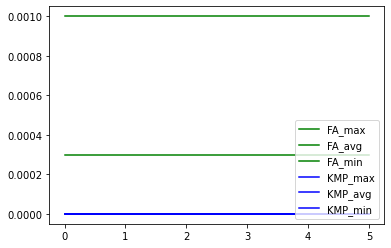

In [104]:
x = np.linspace(0, 5, 100)
FA_max, = plt.plot(x, np.full(100, FA1_test[0]), label='FA_max', color='green')
FA_avg, = plt.plot(x, np.full(100, FA1_test[1]), label='FA_avg', color='green')
FA_min, = plt.plot(x, np.full(100, FA1_test[2]), label='FA_min', color='green')
KMP_max, = plt.plot(x, np.full(100, KMP1_test[0]), label='KMP_max', color='blue')
KMP_avg, = plt.plot(x, np.full(100, KMP1_test[1]), label='KMP_avg', color='blue')
KMP_min, = plt.plot(x, np.full(100, KMP1_test[2]), label='KMP_min', color='blue')
plt.legend(handles=[FA_max, FA_avg, FA_min, KMP_max, KMP_avg, KMP_min], loc='lower right')
plt.show()

### wykres czasów dopasowywania dla wzorca "pan"

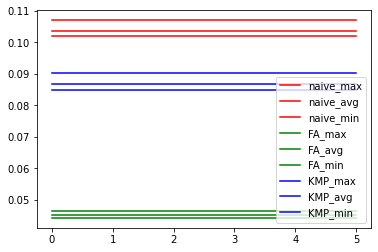

In [105]:
x = np.linspace(0, 5, 100)
naive_max, = plt.plot(x, np.full(100, N1_test[3]), label='naive_max', color='red')
naive_avg, = plt.plot(x, np.full(100, N1_test[4]), label='naive_avg', color='red')
naive_min, = plt.plot(x, np.full(100, N1_test[5]), label='naive_min', color='red')
FA_max, = plt.plot(x, np.full(100, FA1_test[3]), label='FA_max', color='green')
FA_avg, = plt.plot(x, np.full(100, FA1_test[4]), label='FA_avg', color='green')
FA_min, = plt.plot(x, np.full(100, FA1_test[5]), label='FA_min', color='green')
KMP_max, = plt.plot(x, np.full(100, KMP1_test[3]), label='KMP_max', color='blue')
KMP_avg, = plt.plot(x, np.full(100, KMP1_test[4]), label='KMP_avg', color='blue')
KMP_min, = plt.plot(x, np.full(100, KMP1_test[5]), label='KMP_min', color='blue')
plt.legend(handles=[naive_max, naive_avg, naive_min, FA_max, FA_avg, FA_min, KMP_max, KMP_avg, KMP_min], loc='lower right')
plt.show()

## wzorzec "pani"

In [46]:
N2_test = speed_test(N2)
FA2_test = speed_test(FA2)
KMP2_test = speed_test(KMP2)

data = {
    "max pre-processing": [N2_test[0], FA2_test[0], KMP2_test[0]],
    "avg pre-processing": [N2_test[1], FA2_test[1], KMP2_test[1]],
    "min pre-processing": [N2_test[2], FA2_test[2], KMP2_test[2]],
    "max matching": [N2_test[3], FA2_test[3], KMP2_test[3]],
    "avg matching": [N2_test[4], FA2_test[4], KMP2_test[4]],
    "min matching": [N2_test[5], FA2_test[5], KMP2_test[5]]
}

df = pd.DataFrame(data, index = ["Naive", "FA", "KMP"])

print(df)

       max pre-processing  avg pre-processing  min pre-processing  \
Naive               0.000              0.0000                 0.0   
FA                  0.001              0.0005                 0.0   
KMP                 0.000              0.0000                 0.0   

       max matching  avg matching  min matching  
Naive         0.111        0.1080        0.1060  
FA            0.046        0.0445        0.0430  
KMP           0.095        0.0926        0.0911  


### wykres czasów pre-processingu dla wzorca "pani"

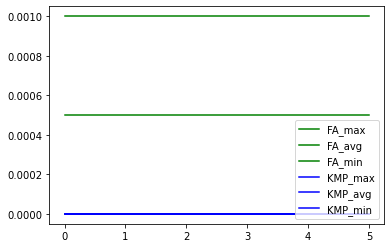

In [106]:
x = np.linspace(0, 5, 100)
FA_max, = plt.plot(x, np.full(100, FA2_test[0]), label='FA_max', color='green')
FA_avg, = plt.plot(x, np.full(100, FA2_test[1]), label='FA_avg', color='green')
FA_min, = plt.plot(x, np.full(100, FA2_test[2]), label='FA_min', color='green')
KMP_max, = plt.plot(x, np.full(100, KMP2_test[0]), label='KMP_max', color='blue')
KMP_avg, = plt.plot(x, np.full(100, KMP2_test[1]), label='KMP_avg', color='blue')
KMP_min, = plt.plot(x, np.full(100, KMP2_test[2]), label='KMP_min', color='blue')
plt.legend(handles=[FA_max, FA_avg, FA_min, KMP_max, KMP_avg, KMP_min], loc='lower right')
plt.show()

### wykres czasów dopasowywania dla wzorca "pani"

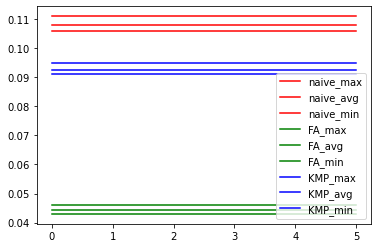

In [107]:
x = np.linspace(0, 5, 100)
naive_max, = plt.plot(x, np.full(100, N2_test[3]), label='naive_max', color='red')
naive_avg, = plt.plot(x, np.full(100, N2_test[4]), label='naive_avg', color='red')
naive_min, = plt.plot(x, np.full(100, N2_test[5]), label='naive_min', color='red')
FA_max, = plt.plot(x, np.full(100, FA2_test[3]), label='FA_max', color='green')
FA_avg, = plt.plot(x, np.full(100, FA2_test[4]), label='FA_avg', color='green')
FA_min, = plt.plot(x, np.full(100, FA2_test[5]), label='FA_min', color='green')
KMP_max, = plt.plot(x, np.full(100, KMP2_test[3]), label='KMP_max', color='blue')
KMP_avg, = plt.plot(x, np.full(100, KMP2_test[4]), label='KMP_avg', color='blue')
KMP_min, = plt.plot(x, np.full(100, KMP2_test[5]), label='KMP_min', color='blue')
plt.legend(handles=[naive_max, naive_avg, naive_min, FA_max, FA_avg, FA_min, KMP_max, KMP_avg, KMP_min], loc='lower right')
plt.show()

## Zaproponuj tekst oraz wzorzec, dla którego zmierzony czas działania algorytmów 2 oraz 3 (uwzględniający tylko dopasowanie, bez pre-processingu) będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego. Uruchom każdy algorytm na zadanym wzorcu i tekście, w celu sprawdzenia, czy zmierzony czas jest faktycznie co najmniej 5-krotnie krótszy (1p).

In [83]:
test_text = "a" * 10_000_000
test_pattern = "a" * 100_000

N_test = naive_algorithm(test_text, test_pattern)
FA_test = fa_algorithm(test_text, test_pattern)
KMP_test = kmp_algorithm(test_text, test_pattern)

In [84]:
T = N_test.solve()
print("\nczas dopasowania: ", T[2])


czas dopasowania:  60.7907030582428


In [85]:
T = FA_test.solve()
print("\nczas dopasowania: ", T[2])


czas dopasowania:  2.3217899799346924


In [86]:
T = KMP_test.solve()
print("\nczas dopasowania: ", T[2])


czas dopasowania:  5.234312534332275


## Przedstaw wnioski wynikające z przeprowadzonych eksperymentów, ze szczególnym uwzględnieniem praktycznych konsekwencji wynikających z różnic pomiędzy zaimplementowanymi algorytmami (1p).

- Pod względem czasu dopasowania algorytm automatu skończonego był najlepszy we wszystkich przeprowadzonych testach 
- Algorytm Knutha-Morrisa-Pratta potrzebował jednak zdecydowanie mniej czasu na proces pre-processoring niż algorytm FA, a co za tym idzie jeśli chodzi o czas całkowity to algorytm Knutha-Morrisa-Pratta był najlepszy
- W przypadku losowego wzorca o dużej długości algorytm FA bardzo szybko spowalnia proces pre-processingu
- jeśli zależy nam zatem na czasie dopsowania to najlepszym wyborem będzie algorytm automatu skończonego, natomiast jeśli chcemy zoptymalizować czas całkowity to lepiej do tego celu sprawdzi się algorytm Knutha-Morrisa-Pratta
- Algorytm naiwny okazuje się dużo wolniejszy od dwóch pozostałych algorytmów kiedy długość szukanego wzorca jest duża
- Dodatkowo kiedy tekst jest wielokrotnością wzorca zwiększanie długości wzorca o rząd wielkości nie powoduje wydłużenia się czasu dopasowania dla dwóch algorytmów z pre-processoringiem, natomiast algorytm naiwny zwiększa czas bardzo szybko z powodu rosnącego czasu dopasowywania